# KNN class

In [55]:
import numpy as np

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train



    def predict(self, X_test):
            predictions = []
            for x in X_test:
                distances = np.linalg.norm(x - self.X_train, axis=1)
                nearest_neighbors = np.argsort(distances)[:self.k]
                majority_class = np.argmax(np.bincount(self.y_train[nearest_neighbors]))
                predictions.append(majority_class)
            return np.array(predictions)


# Iris dataset

In [56]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
print(iris.DESCR)
print(iris['data'].shape, iris['target'].shape)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# EDA

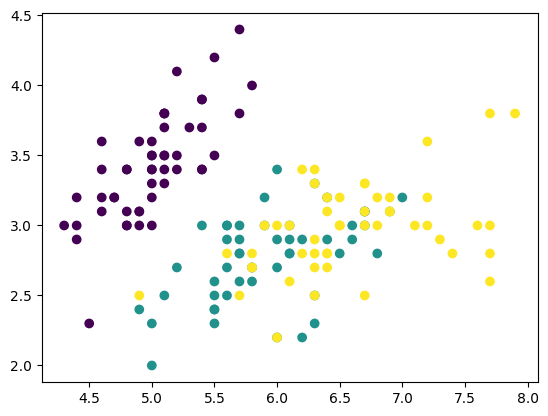

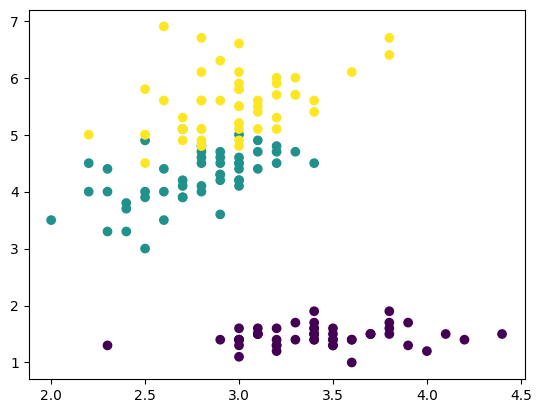

In [72]:
plt.scatter(iris['data'][:, 0], iris['data'][:, 1], c=iris['target'])
plt.show()
plt.scatter(iris['data'][:, 1], iris['data'][:, 2], c=iris['target'])
plt.show()

# Train test split

In [57]:
# 75% train 25% test

from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(iris['data'], iris['target'], test_size=0.25, random_state=5)

# Model training

In [58]:
clf = KNN(k=5)
clf.fit(train_data, train_target)

pred_train_target = clf.predict(train_data)
pred_test_target = clf.predict(test_data)

# Model evaluation

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix

train_accuracy_score = accuracy_score(train_target, pred_train_target)
test_accuracy_score = accuracy_score(test_target, pred_test_target)

print(f'Train accuracy: {train_accuracy_score}')
print(f'Test accuracy: {test_accuracy_score}')

train_conf_matrix = confusion_matrix(train_target, pred_train_target)
test_conf_matrix = confusion_matrix(test_target, pred_test_target)

print(train_conf_matrix)

print(test_conf_matrix)

Train accuracy: 0.9821428571428571
Test accuracy: 0.9473684210526315
[[38  0  0]
 [ 0 35  1]
 [ 0  1 37]]
[[12  0  0]
 [ 0 12  2]
 [ 0  0 12]]


# Finding best K

Text(0, 0.5, 'Test accuracy score')

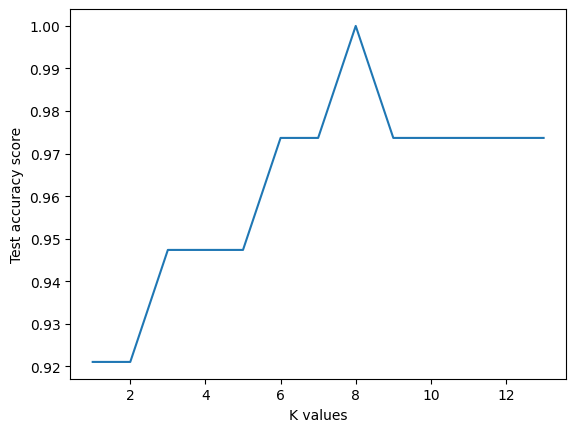

In [66]:
acc_scores = []
for i in range(1, 14):
    clf = KNN(k=i)
    clf.fit(train_data, train_target)

    pred_test_target = clf.predict(test_data)

    test_accuracy_score = accuracy_score(test_target, pred_test_target)

    acc_scores.append([i, test_accuracy_score])



x = [point[0] for point in acc_scores]
y = [point[1] for point in acc_scores]
plt.plot(x, y)
plt.xlabel('K values')
plt.ylabel('Test accuracy score')

